In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [8]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.cluster import KMeans


In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

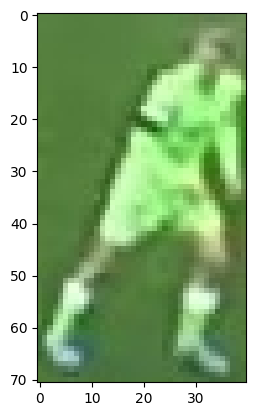

In [3]:
plt.imshow(image)
plt.show()

# Take the top half of the image

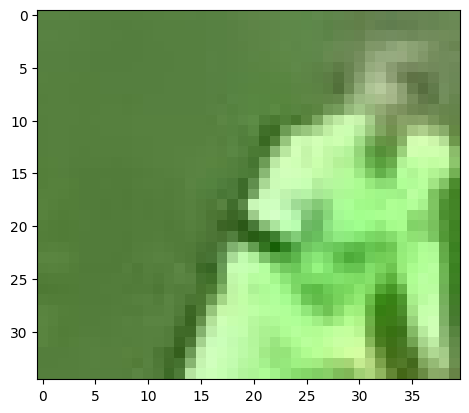

In [4]:
top_half_image = image[0:int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

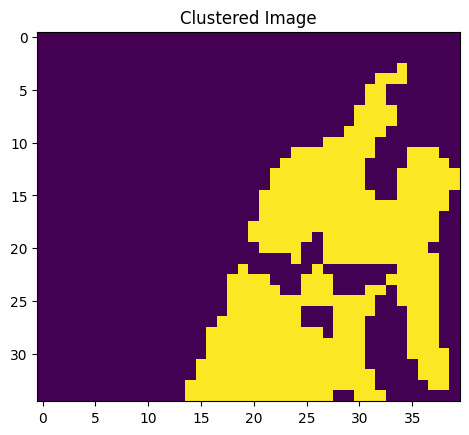

In [16]:
# Reshape the image into a 2D array
image_2d = top_half_image.reshape((-1, 3))

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)
# get the cluster labels
labels = kmeans.labels_

# Reshape the labels back to the top half image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.title("Clustered Image")
plt.show()

In [21]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

print(non_player_cluster)


0


In [22]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [23]:
kmeans.cluster_centers_[player_cluster]

array([170.20854271, 234.31909548, 144.33165829])